In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [2]:
housingdf = pd.read_csv('https://raw.githubusercontent.com/suxeno/StudyDateAI-Week1-Evaluation-Dataset/refs/heads/main/portugal-housing-sample.csv')

In [ ]:
housingdf.head()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,55000.0,Coimbra,Figueira da Foz,Alqueidão,Land,NC,NaN,False,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,NaN,NaN,0.0
1,289000.0,Setúbal,Montijo,Canha,House,D,NaN,False,2.0,True,...,NaN,NaN,4.0,NaN,NaN,NaN,156.0,NaN,NaN,4.0
2,46500.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,2880.0,NaN,0.0
3,203000.0,Porto,Vila Nova de Gaia,Vilar de Andorinho,Apartment,E,3rd Floor,True,1.0,True,...,NaN,NaN,2.0,NaN,NaN,NaN,92.0,NaN,NaN,2.0
4,72500.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,1954.0,NaN,0.0


**EDA & PREPROCESSING**

In [ ]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 20000 non-null  float64
 1   District              20000 non-null  object 
 2   City                  20000 non-null  object 
 3   Town                  19999 non-null  object 
 4   Type                  20000 non-null  object 
 5   EnergyCertificate     20000 non-null  object 
 6   Floor                 4925 non-null   object 
 7   Lift                  11874 non-null  object 
 8   Parking               19967 non-null  float64
 9   HasParking            11874 non-null  object 
 10  ConstructionYear      12965 non-null  float64
 11  TotalArea             18941 non-null  float64
 12  GrossArea             4790 non-null   float64
 13  PublishDate           2668 non-null   object 
 14  Garage                8123 non-null   object 
 15  Elevator           

In [5]:
data_karakter = housingdf.select_dtypes(include=['object'])
data_karakter.columns

Index(['District', 'City', 'Town', 'Type', 'EnergyCertificate', 'Floor',
       'Lift', 'HasParking', 'PublishDate', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'ConservationStatus'],
      dtype='object')

In [4]:
data_numerik = housingdf.select_dtypes(include=['int64', 'float'])
data_numerik.columns

Index(['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'GrossArea',
       'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize',
       'BuiltArea', 'NumberOfBathrooms'],
      dtype='object')

**CLEANSING DATA:**

In [ ]:
housingdf.isna().sum()

,0
Price,0
District,0
City,0
Town,1
Type,0
EnergyCertificate,0
Floor,15075
Lift,8126
Parking,33
HasParking,8126


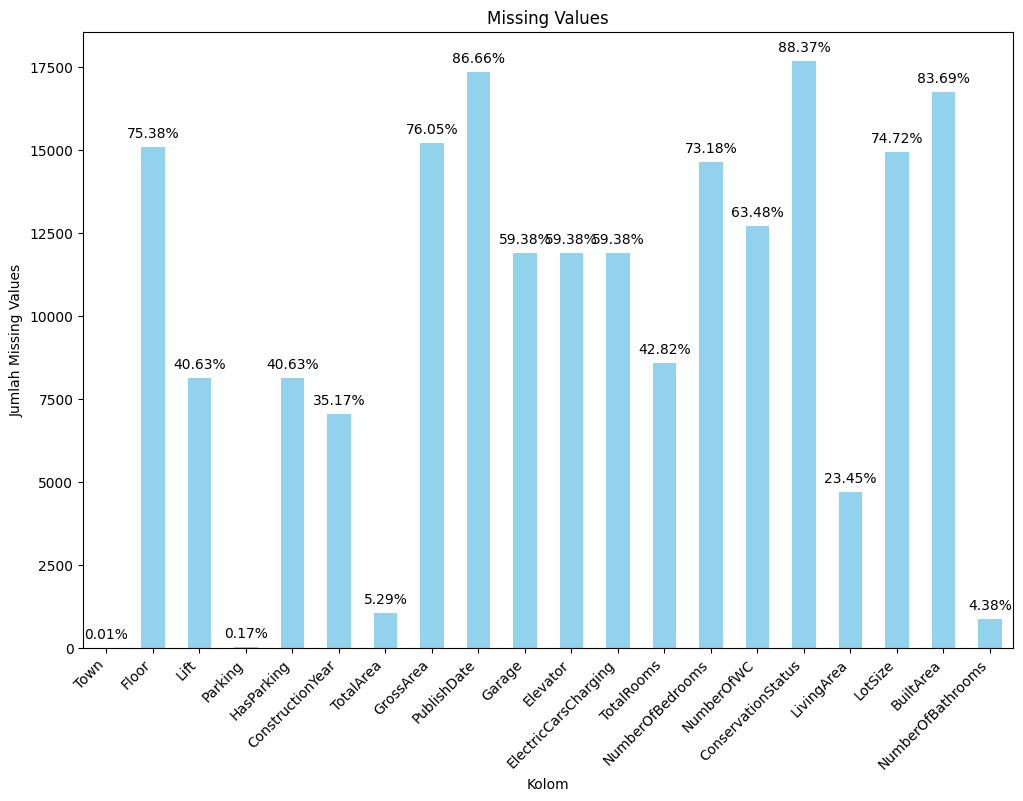

In [ ]:
import matplotlib.pyplot as plt

rows_length = housingdf.shape[0]
fields_with_nan_length = housingdf.isna().sum().where(lambda x: x > 0).dropna()

plt.figure(figsize=(12, 8))

ax = fields_with_nan_length.plot(
    kind='bar', alpha=0.9, color='skyblue', title='Missing Values', rot=45
)

for i in ax.patches:
    ax.text(
        i.get_x() + i.get_width() / 2, i.get_height() + rows_length * 0.01,
        f"{(i.get_height() / rows_length * 100):.2f}%", ha='center', va='bottom'
    )

ax.set_ylabel('Jumlah Missing Values')
ax.set_xlabel('Kolom')

plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
housingdf=housingdf.drop(columns=['Floor', 'Lift', 'GrossArea', 'PublishDate', 'Garage', 'Elevator', 'ElectricCarsCharging',
                        'NumberOfWC', 'ConservationStatus', 'BuiltArea', 'LotSize', 'EnergyCertificate', 'NumberOfBedrooms'], axis=1)
housingdf.head()

,Price,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
0,55000.0,Coimbra,Figueira da Foz,Alqueidão,Land,0.0,False,NaN,1287.0,NaN,1287.0,0.0
1,289000.0,Setúbal,Montijo,Canha,House,2.0,True,1986.0,306.0,4.0,156.0,4.0
2,46500.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,203000.0,Porto,Vila Nova de Gaia,Vilar de Andorinho,Apartment,1.0,True,1996.0,118.0,2.0,92.0,2.0
4,72500.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Land,0.0,NaN,NaN,1954.0,NaN,NaN,0.0


In [ ]:
#Impute using random forest
numeric_data = housingdf.select_dtypes(include=['float64','int64'])
null_columns = numeric_data.columns[numeric_data.isna().any()].tolist()

imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=20, random_state=0)
housingdf[null_columns] = imputer.fit_transform(housingdf[null_columns])

housingdf[housingdf.columns] = housingdf

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
#Ngubah kolom kategorik jadi numerik
encoder = LabelEncoder()
categorical_columns = housingdf.select_dtypes(include=['object']).columns
for col in categorical_columns:
    housingdf[col] = encoder.fit_transform(housingdf[col])

In [ ]:
housingdf.describe()

,Price,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
count,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000
mean,3.604319e+05,11.537400,133.462000,897.60720,6.044900,0.581852,1.080600,1987.453121,3.113403e+04,2.787095,4.864551e+03,1.472991
std,6.820353e+05,6.298014,73.563314,537.66063,5.250292,0.883457,0.851786,24.453776,1.604789e+06,19.650535,5.991201e+04,1.718641
min,1.000000e+02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1900.000000,-2.350000e+02,0.000000,0.000000e+00,-13.000000
25%,7.950000e+04,5.000000,73.000000,418.00000,0.000000,0.000000,0.000000,1970.000000,9.800000e+01,1.000000,8.900000e+01,0.000000
50%,2.000000e+05,14.000000,120.000000,902.00000,7.000000,0.000000,1.000000,1990.710000,1.960000e+02,2.194940,1.500000e+02,1.000000
75%,3.900000e+05,16.000000,204.000000,1370.25000,10.000000,1.000000,2.000000,2005.000000,8.700775e+02,3.810000,4.226300e+02,2.000000
max,3.600000e+07,23.000000,263.000000,1869.00000,20.000000,3.000000,2.000000,2024.000000,1.656206e+08,2751.000000,5.429000e+06,61.000000


**VISUALISASI DATA:**

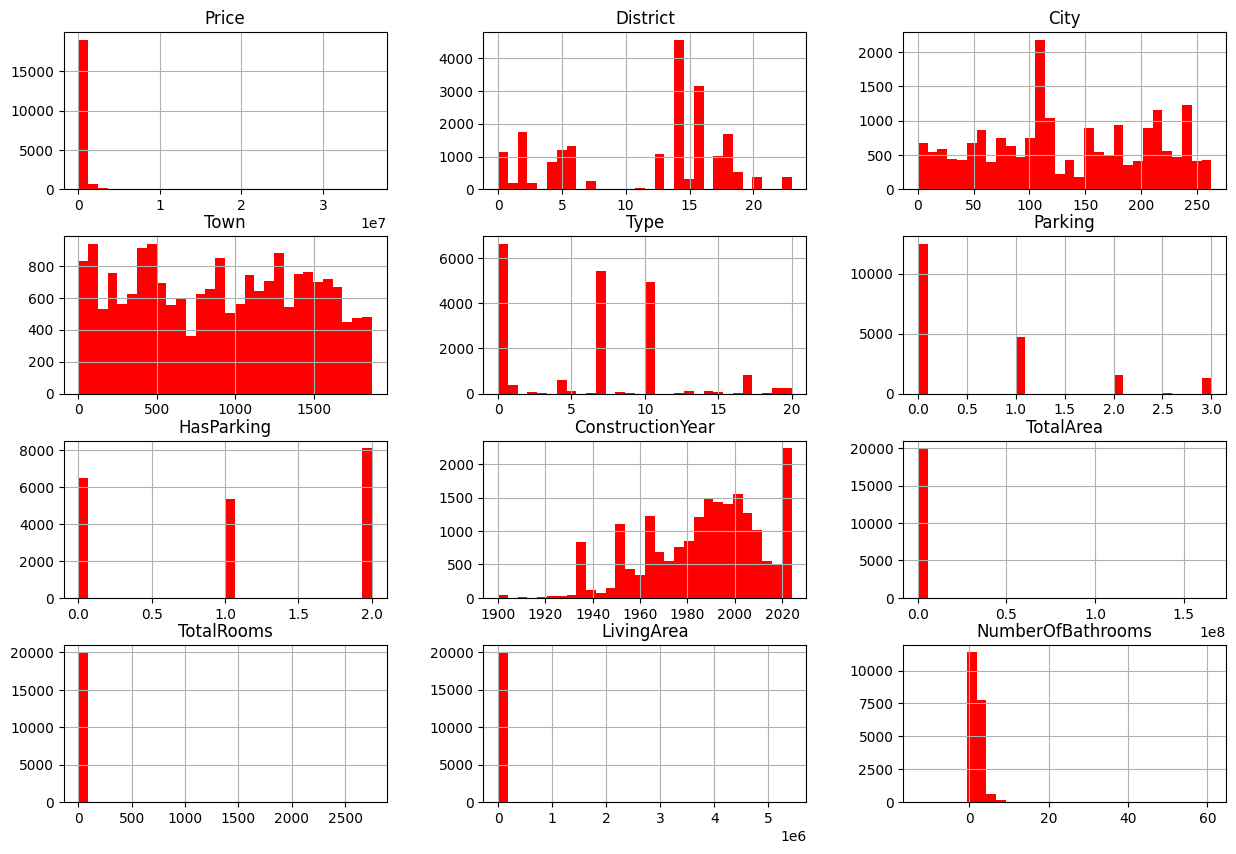

In [ ]:
# Histogram
housingdf.hist(figsize=(15, 10), bins=30,color='red');

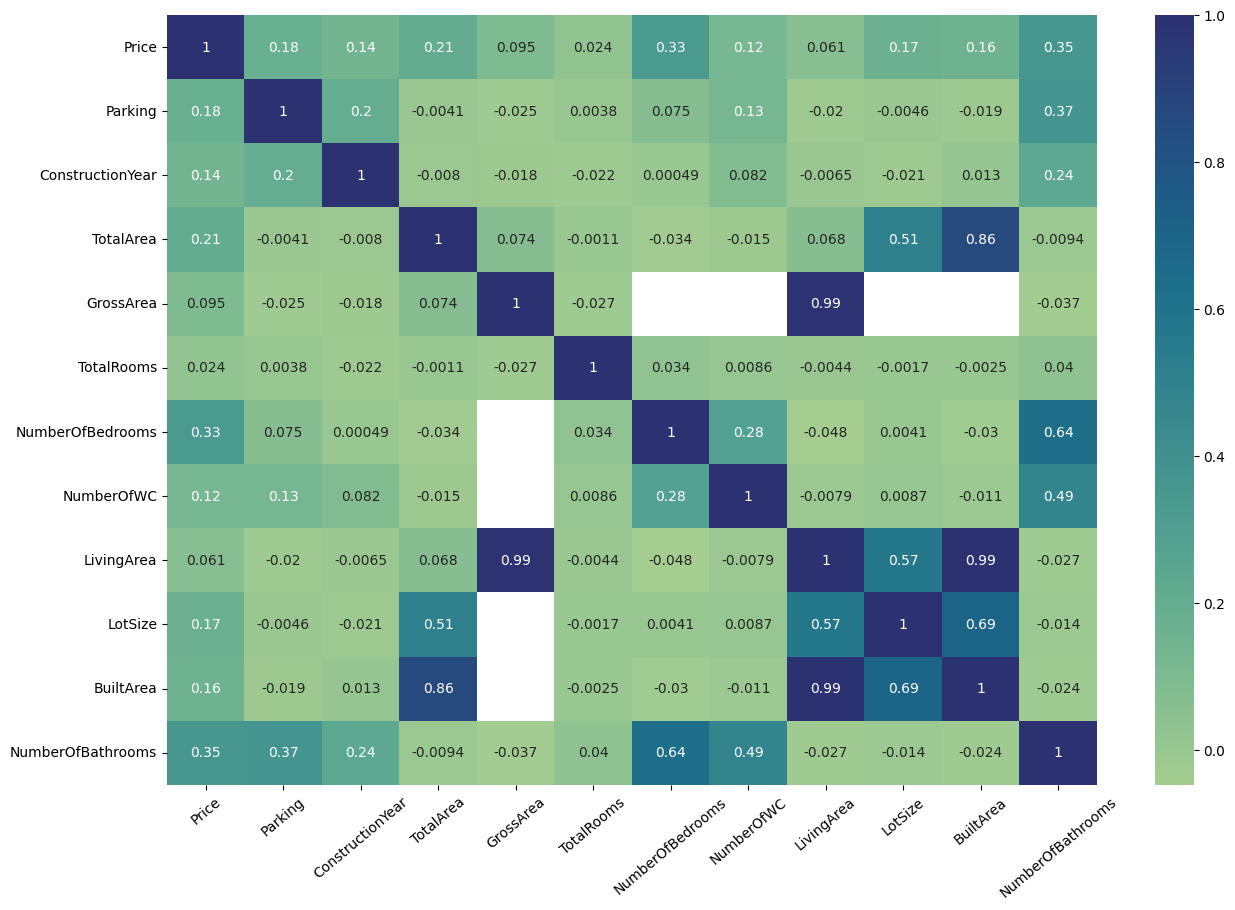

In [8]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_numerik.corr(), annot=True, cmap='crest')
plt.xticks(rotation=40)
plt.show()

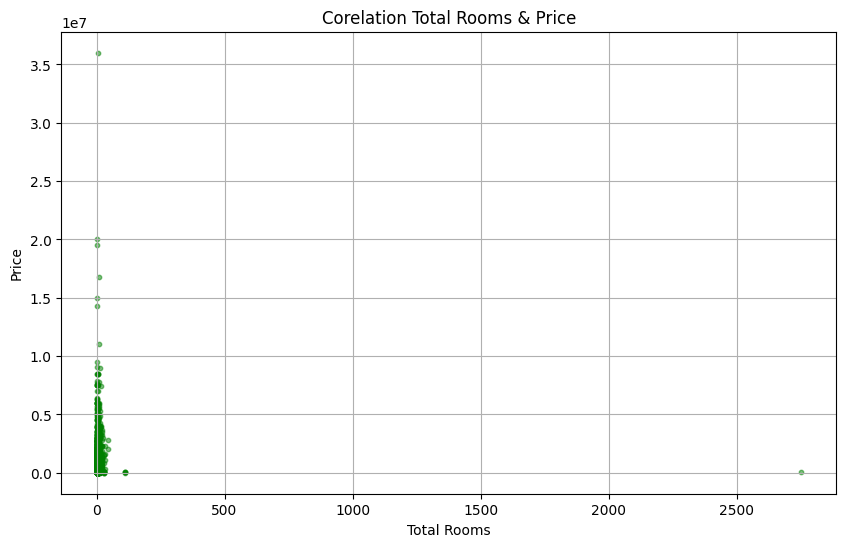

In [ ]:
# ScatterPlot
plt.figure(figsize=(10, 6))
plt.scatter(x=housingdf['TotalRooms'], y=housingdf['Price'], color='green', alpha=0.5, s=10)
plt.title('Corelation Total Rooms & Price')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

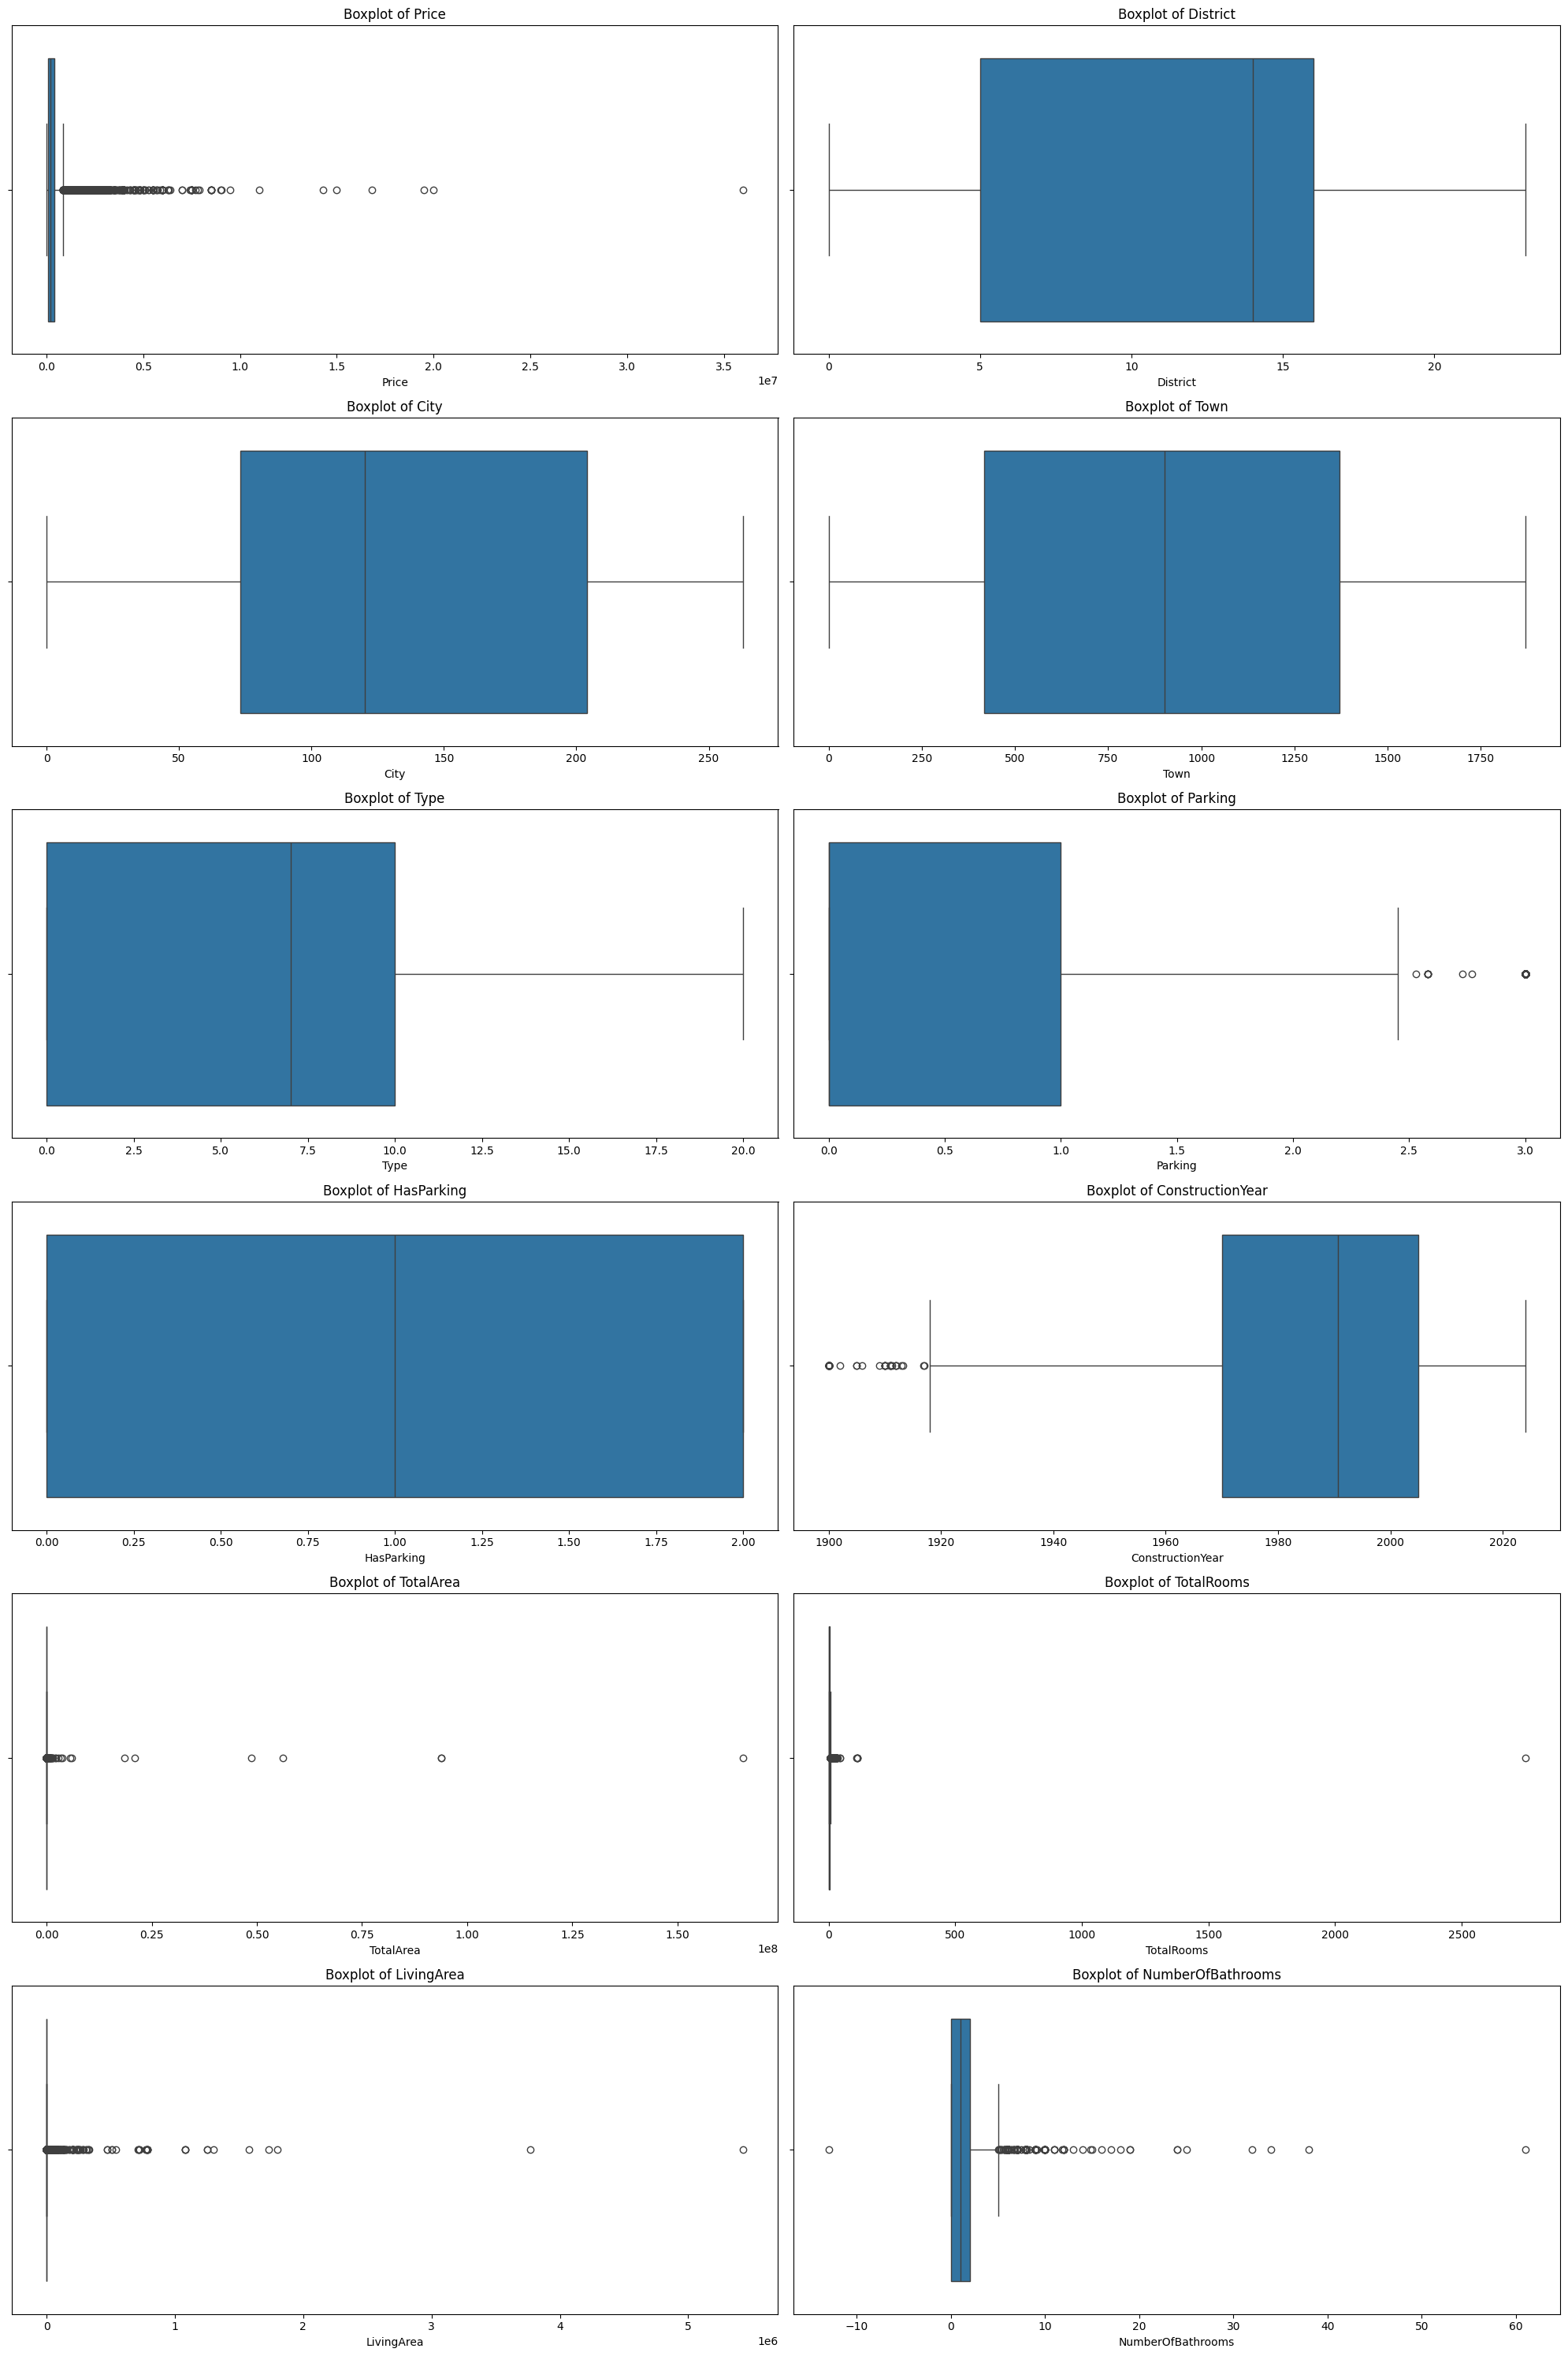

In [ ]:
#Ini visual boxplot ges
# Dapet numeric columns dari DataFrame
numeric_cols = housingdf.select_dtypes(exclude='object').columns

num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=housingdf[col], ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")

for i in range(num_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**OUTLIERS HANDLING:**

In [ ]:
# Menangani data outlier dengan mengubah nilai outlier ke nilai kuartil terdekat(Kuartil 1 dan Kuartil 3).
def iqr_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[col] = data[col].mask(data[col] < lower_bound, Q1)
    data[col] = data[col].mask(data[col] > upper_bound, Q3)
    return data

for col in housingdf.select_dtypes(include=['float64', 'int64']).columns:
    iqr_outliers(housingdf, col)


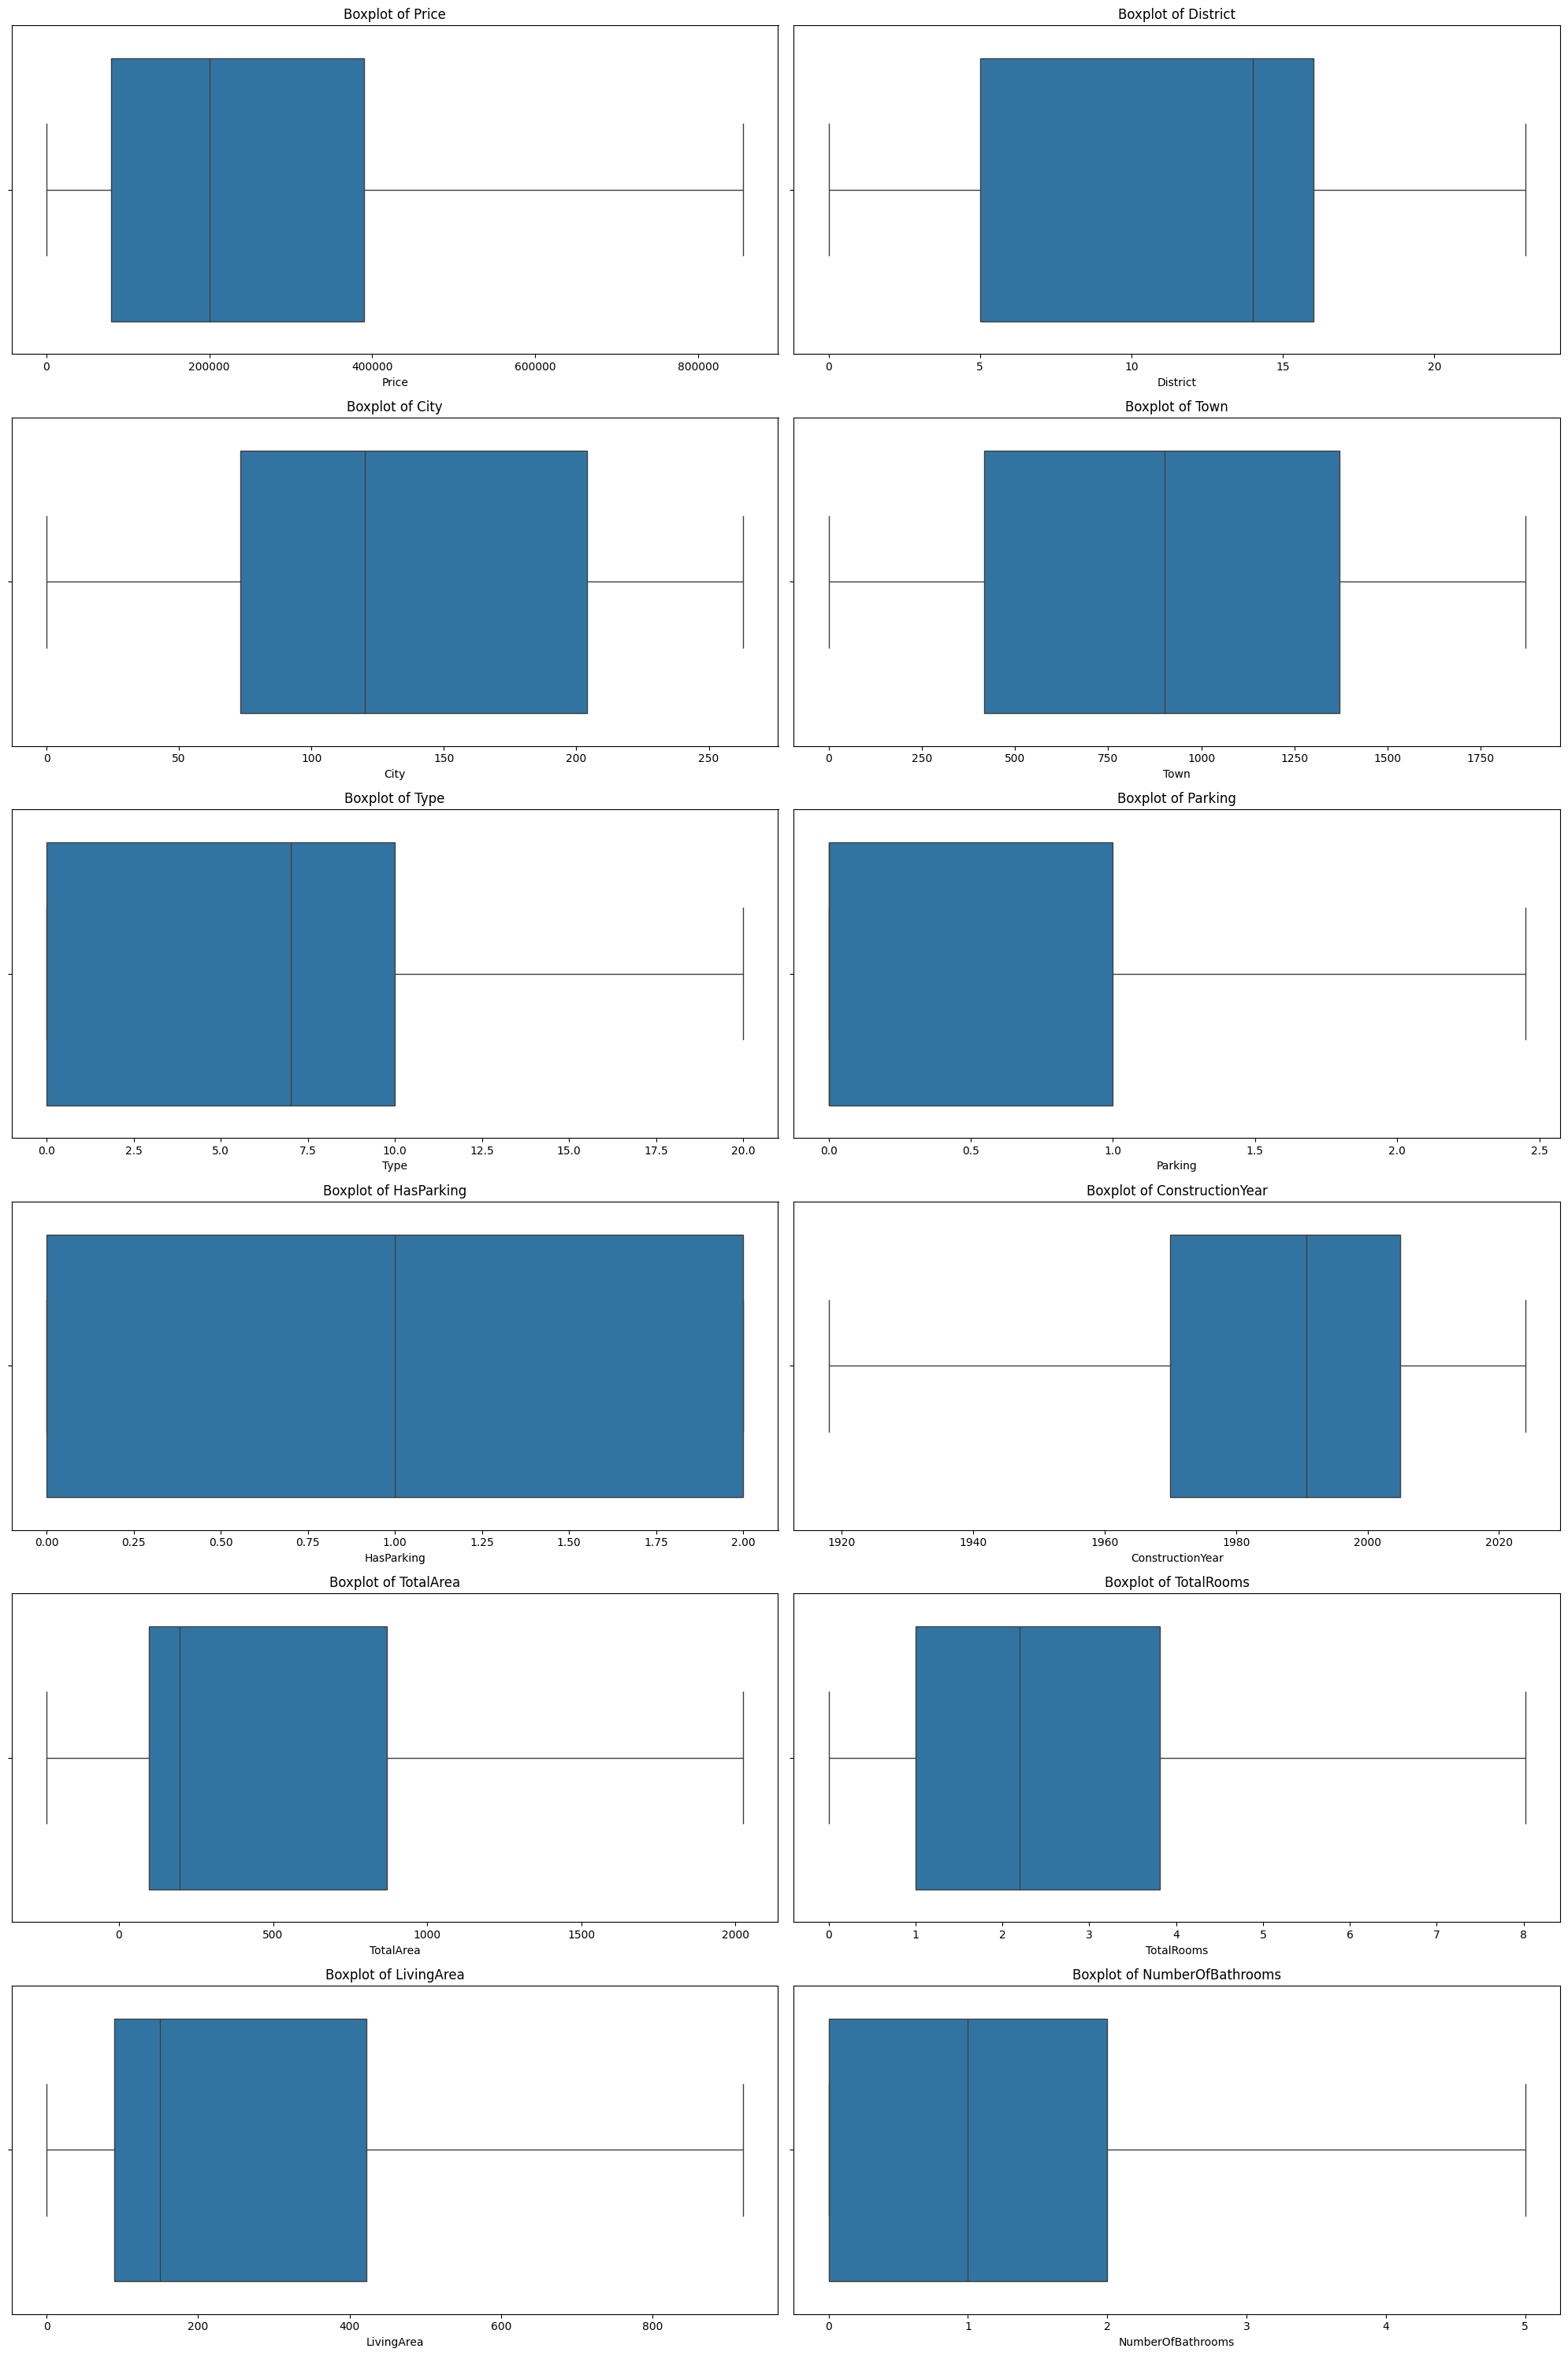

In [ ]:
numeric_cols = housingdf.select_dtypes(exclude='object').columns

num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 2)

fig, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=housingdf[col], ax=axes[idx])
    axes[idx].set_title(f"Boxplot of {col}")

for i in range(num_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**NORMALIZATION AND SCALLING FOR MODEL:**

In [ ]:
# membagi data fitur dan data target
x = housingdf.drop('Price', axis=1)
y = housingdf['Price']

array([[<Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Town'}>],
       [<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'HasParking'}>],
       [<Axes: title={'center': 'ConstructionYear'}>,
        <Axes: title={'center': 'TotalArea'}>,
        <Axes: title={'center': 'TotalRooms'}>],
       [<Axes: title={'center': 'LivingArea'}>,
        <Axes: title={'center': 'NumberOfBathrooms'}>, <Axes: >]],
      dtype=object)

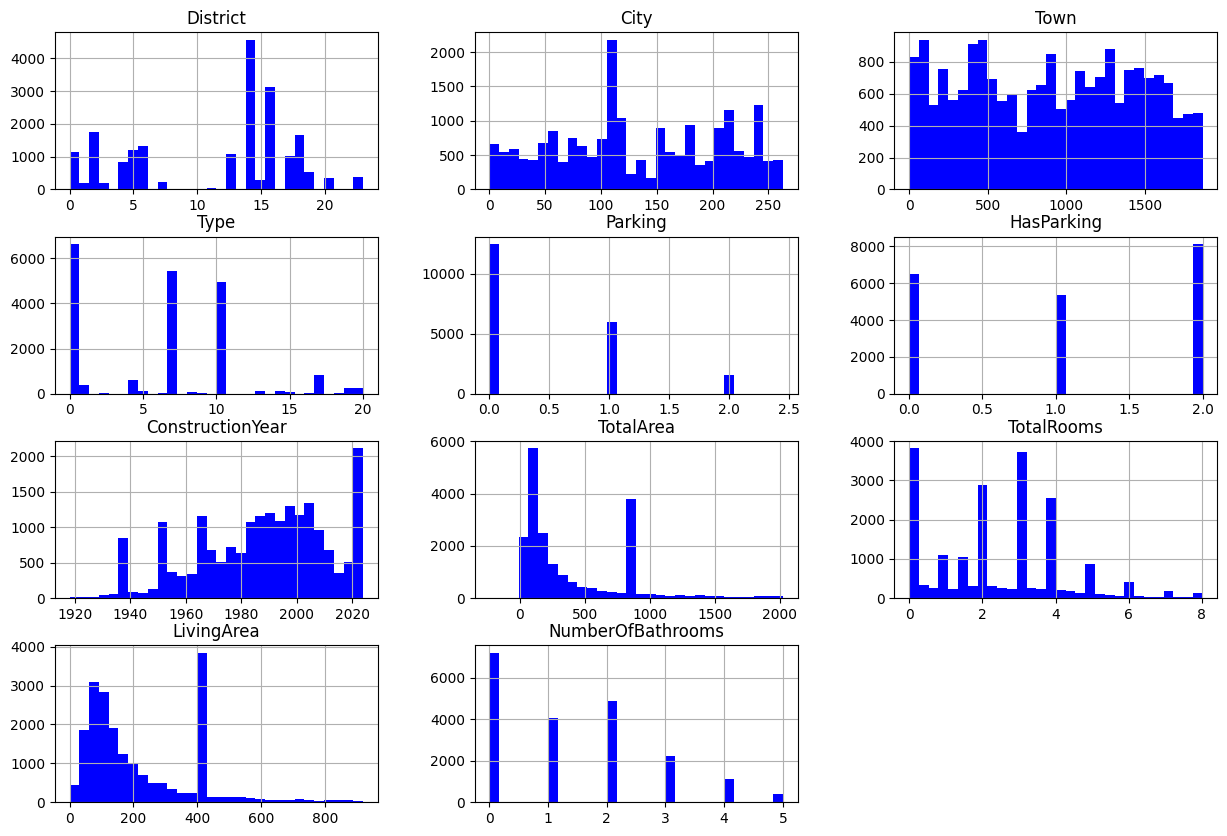

In [ ]:
#New Histogram
x.hist(figsize=(15, 10), bins=30,color='blue')

**TRAINING AND SPLITTING:**

In [ ]:
#Train declaration
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_regression, k=10)),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
#Cek data training di x
x_train.head()

,District,City,Town,Type,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,LivingArea,NumberOfBathrooms
5894,2,49,312,0,0.0,0,2007.00,93.0000,3.00,93.00,0.0
3728,19,231,1728,10,0.0,0,1970.00,870.0775,0.00,422.63,0.0
8958,14,213,1564,10,0.0,0,2007.04,870.0775,0.00,422.63,0.0
7671,14,110,1082,0,0.0,2,2023.00,104.0000,2.37,97.00,2.0
5999,14,225,0,7,1.0,1,2007.00,390.0000,6.00,335.00,2.0


In [ ]:
#Cek data training di y
y_train.head()

,Price
5894,425000.0
3728,90000.0
8958,20000.0
7671,520000.0
5999,675000.0


**USING RIDGE REGRESSION MODEL:**

In [ ]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(x_train, y_train)

y_pred_rd = model_ridge.predict(x_test)

model_ridge.intercept_

-2045542.8511950104

In [ ]:
ridge_coef = pd.DataFrame({'Columns':x.columns, 'Coefficient':model_ridge.coef_})
ridge_coef

,Columns,Coefficient
0,District,3382.168519
1,City,49.732418
2,Town,-17.147204
3,Type,-6102.085174
4,Parking,31544.119506
5,HasParking,5341.244595
6,ConstructionYear,1073.907420
7,TotalArea,12.444448
8,TotalRooms,15412.911151
9,LivingArea,151.340614


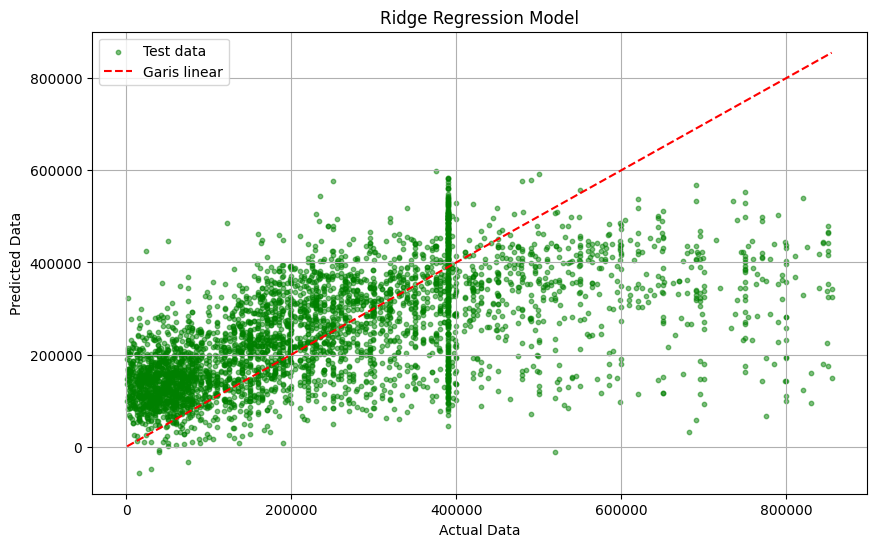

In [ ]:
# visualisasi scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rd, color='green', label='Test data', alpha=0.5, s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis linear', linestyle= '--')
plt.title('Ridge Regression Model')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'feature_selection__k': [5, 10, 15],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=15 is greater than n_features=11. All the features will be returned.
  warnings.warn(


Best Parameters: {'feature_selection__k': 15, 'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
R2 Score: 0.6168666883989815
MAE: 79696.61694668882
MSE: 13533323579.165512
RMSE: 116332.81385389727
